Linear Kernel Accuracy: 0.9442
RBF Kernel Accuracy: 0.9340
Polynomial Kernel Accuracy: 0.9036


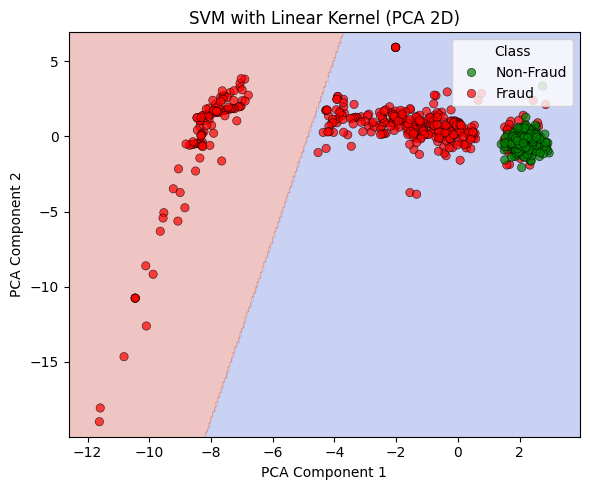

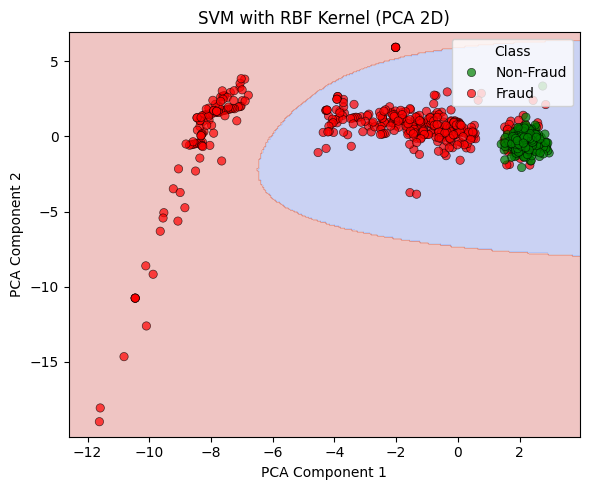

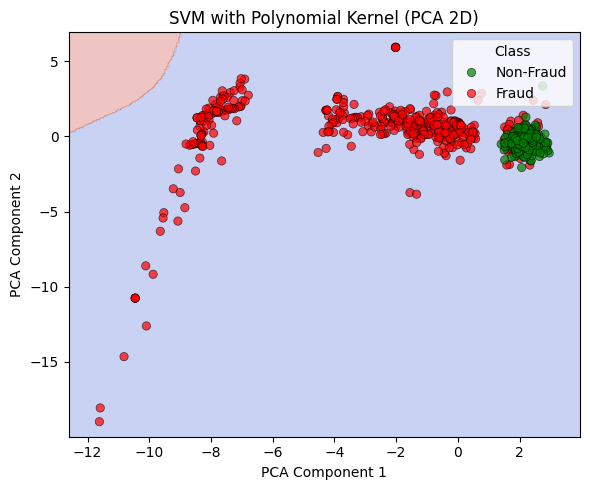


Explanation of Kernel Effect:

Linear Kernel: imagines a linear decision boundary, suitable when data is linearly separable. It maximizes the margin between Non-Fraud and Fraud classes using a hyperplane; it performs well if the data is linearly separable.
RBF (Radial Basis Function) Kernel: Maps data to a higher-dimensional space using a Gaussian function, handling non-linear relationships. It’s effective for complex data but sensitive to parameteric conditions.
Polynomial Kernel: Uses polynomial terms to map non-linear patterns in higher dimensions. Its degree (default 3) affects flexibility—higher degrees fit complex data but may overfit.
Conclusion:
The kernel choice impacts accuracy based on a data complexity; linear works for simple separations, while RBF and polynomial are better with non-linear patterns between Non-Fraud and Fraud cases.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Loading the Dataset
df = pd.read_csv("/content/creditcard.csv")
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)
balanced_df = pd.concat([fraud, normal])

# Spliting Features & Labels
X = balanced_df.drop(columns=["Class", "Time"]).values  # Convert to NumPy array
y = balanced_df["Class"].values  # Convert to NumPy array

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-Test Split
X_train, X_test, y_train, y_test, X_pca_train, X_pca_test = train_test_split(
    X_scaled, y, X_pca, test_size=0.2, random_state=42
)

# Training the SVM kernels
def train_and_evaluate_svm(kernel):
    if kernel == 'poly':
        svm = SVC(kernel=kernel, degree=3)
    else:
        svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return svm, acc

svm_linear, acc_linear = train_and_evaluate_svm('linear')
svm_rbf, acc_rbf = train_and_evaluate_svm('rbf')
svm_poly, acc_poly = train_and_evaluate_svm('poly')

print(f"Linear Kernel Accuracy: {acc_linear:.4f}")
print(f"RBF Kernel Accuracy: {acc_rbf:.4f}")
print(f"Polynomial Kernel Accuracy: {acc_poly:.4f}")

# PCA plot boundaries
def plot_svm_decision_boundary(model, X_pca_data, title):
    x_min, x_max = X_pca_data[:, 0].min() - 1, X_pca_data[:, 0].max() + 1
    y_min, y_max = X_pca_data[:, 1].min() - 1, X_pca_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    mesh_pca = np.c_[xx.ravel(), yy.ravel()]
    mesh_original = pca.inverse_transform(mesh_pca)
    mesh_scaled = scaler.transform(mesh_original)  # Scale the transformed mesh

    Z = model.predict(mesh_scaled)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    scatter = sns.scatterplot(x=X_pca_data[:, 0], y=X_pca_data[:, 1], hue=y,
                    palette=["green", "red"], alpha=0.7, edgecolor="k",
                    hue_order=[0, 1])
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    handles, _ = scatter.get_legend_handles_labels()
    scatter.legend(handles, ["Non-Fraud", "Fraud"], title='Class', loc='upper right')
    plt.tight_layout()
    plt.show()

# Visualizing each SVM kernel
plot_svm_decision_boundary(svm_linear, X_pca, "SVM with Linear Kernel ")
plot_svm_decision_boundary(svm_rbf, X_pca, "SVM with RBF Kernel")
plot_svm_decision_boundary(svm_poly, X_pca, "SVM with Polynomial Kernel )")

print("\nExplanation of Kernel Effect:")
print("""
Linear Kernel: imagines a linear decision boundary, suitable when data is linearly separable. It maximizes the margin between Non-Fraud and Fraud classes using a hyperplane; it performs well if the data is linearly separable.
RBF (Radial Basis Function) Kernel: Maps data to a higher-dimensional space using a Gaussian function, handling non-linear relationships. It’s effective for complex data but sensitive to parameteric conditions.
Polynomial Kernel: Uses polynomial terms to map non-linear patterns in higher dimensions. Its degree (default 3) affects flexibility—higher degrees fit complex data but may overfit.
Conclusion:
The kernel choice impacts accuracy based on a data complexity; linear works for simple separations, while RBF and polynomial are better with non-linear patterns between Non-Fraud and Fraud cases.
""")